In [1]:
from __future__ import absolute_import,division,print_function
try:
  %tensorflow_version 2.x
except:
  pass
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_dir = tf.keras.utils.get_file("cats_and_dogs_filtered.zip",origin = _URL,extract = True)

In [4]:
base_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [5]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')


In [6]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_train + num_dogs_train
total_val = num_cats_val + num_dogs_val

In [7]:
print("total training cat images:",num_cats_train)
print("total training dog images:",num_dogs_train)

print("total validation cat images:",num_cats_val)
print("total validation dog images:",num_dogs_val)

print("total training images:",total_train)
print("total validation images:",total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total training images: 2000
total validation images: 1000


In [8]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [9]:
def plotImages(images_arr):
    fig,axes = plt.subplots(1,5,figsize=(25,25))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [10]:
image_gen = ImageDataGenerator(rescale = 1./255,
                              rotation_range = 40,
                              width_shift_range = 0.2,
                              height_shift_range = 0.2,
                              shear_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True,
                              fill_mode = 'nearest')

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                              directory = train_dir,
                                              shuffle = True,
                                              target_size = (IMG_SHAPE,IMG_SHAPE),
                                              class_mode = 'binary')

Found 2000 images belonging to 2 classes.


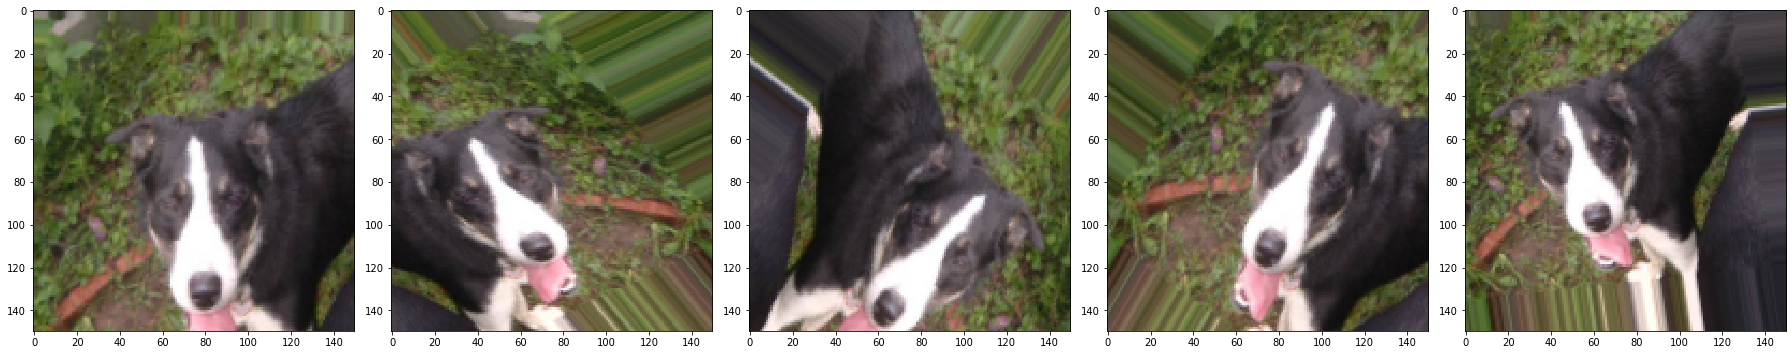

In [11]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [12]:
image_gen_val = ImageDataGenerator(rescale= 1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size = BATCH_SIZE,
                                                directory = validation_dir,
                                                shuffle = False,
                                                target_size = (IMG_SHAPE,IMG_SHAPE),
                                                class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (IMG_SHAPE,IMG_SHAPE,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2,activation = 'softmax')
])

In [14]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
epochs = 50
history = model.fit_generator(train_data_gen,
                             steps_per_epoch = math.ceil(total_train/float(BATCH_SIZE)),
                             epochs = epochs,
                             validation_data = val_data_gen,
                             validation_steps = math.ceil(total_val/float(BATCH_SIZE))
                             )

Epoch 1/50
20/20 [==============================] - 101s 5s/step - loss: 0.6987 - accuracy: 0.5035 - val_loss: 0.6921 - val_accuracy: 0.6040
Epoch 2/50
20/20 [==============================] - 97s 5s/step - loss: 0.6922 - accuracy: 0.5155 - val_loss: 0.6843 - val_accuracy: 0.5680
Epoch 3/50
20/20 [==============================] - 104s 5s/step - loss: 0.6832 - accuracy: 0.5740 - val_loss: 0.6655 - val_accuracy: 0.5890
Epoch 4/50
20/20 [==============================] - 99s 5s/step - loss: 0.6677 - accuracy: 0.5925 - val_loss: 0.6280 - val_accuracy: 0.6640
Epoch 5/50
20/20 [==============================] - 98s 5s/step - loss: 0.6506 - accuracy: 0.6190 - val_loss: 0.6270 - val_accuracy: 0.6360
Epoch 6/50
20/20 [==============================] - 130s 7s/step - loss: 0.6329 - accuracy: 0.6480 - val_loss: 0.6007 - val_accuracy: 0.6940
Epoch 7/50
 2/20 [==>...........................] - ETA: 2:10 - loss: 0.6452 - accuracy: 0.6100

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label = "Training Accuracy")
plt.plot(epochs_range,val_acc,label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")


plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label = "Training Loss")
plt.plot(epochs_range,val_loss,label = 'Validation Loss')
plt.legend(loc = 'upper left')
plt.title("Training and Validation Loss")
plt.show()